## DUSP1 Dataframe Concatenation and Replica Check
- Concatenate experimental dataframes based on specific conditions:
    - **100nM 3hr Time-Sweep (TS):** Data collected over a 3-hour time period with a fixed concentration of 100nM.
    - **75min Concentration-Sweep:** Data collected over varying concentrations during a 75-minute time period.
    - **3hr Time-Concentration Sweep (TCS):** Data collected over a 3-hour period with varying concentrations.
    - **Triptiolide (TPL):** Data collected under conditions involving Triptiolide treatment.
- Perform a replica check to ensure data consistency and identify any discrepancies across experimental replicates.
- Document and visualize the concatenated data for further analysis.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import sys
import datetime

import h5py
import dask.array as da

# src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
# print(src_path)
# sys.path.append(src_path)

# from src.Analysis_DUSP1_v2 import DUSP1DisplayManager

## DUSP1 TS Experiments
- Replica's D, E, F
- Partial's M, N

In [2]:
# Load in the dataframes

DUSP1_RepD_results = pd.read_csv('/Users/ericron/Desktop/AngelFISH/Publications/Ron_2024/dataframes/DUSP1_D_cell_level_results_Apr21_filtered_MG3.csv')
DUSP1_RepD_spots = pd.read_csv('/Users/ericron/Desktop/AngelFISH/Publications/Ron_2024/dataframes/DUSP1_D_merged_spots_Apr21_filtered_MG3.csv')
DUSP1_RepD_clusters = pd.read_csv('/Users/ericron/Desktop/AngelFISH/Publications/Ron_2024/dataframes/DUSP1_D_merged_clusters_Apr21_filtered_MG3.csv')

DUSP1_RepE_results = pd.read_csv('/Users/ericron/Desktop/AngelFISH/Publications/Ron_2024/dataframes/DUSP1_E_cell_level_results_Apr21_filtered_MG3.csv')
DUSP1_RepE_spots = pd.read_csv('/Users/ericron/Desktop/AngelFISH/Publications/Ron_2024/dataframes/DUSP1_E_merged_spots_Apr21_filtered_MG3.csv')
DUSP1_RepE_clusters = pd.read_csv('/Users/ericron/Desktop/AngelFISH/Publications/Ron_2024/dataframes/DUSP1_E_merged_clusters_Apr21_filtered_MG3.csv')

DUSP1_RepF_results = pd.read_csv('/Users/ericron/Desktop/AngelFISH/Publications/Ron_2024/dataframes/DUSP1_F_cell_level_results_Apr21_filtered_MG3.csv')
DUSP1_RepF_spots = pd.read_csv('/Users/ericron/Desktop/AngelFISH/Publications/Ron_2024/dataframes/DUSP1_F_merged_spots_Apr21_filtered_MG3.csv')
DUSP1_RepF_clusters = pd.read_csv('/Users/ericron/Desktop/AngelFISH/Publications/Ron_2024/dataframes/DUSP1_F_merged_clusters_Apr21_filtered_MG3.csv')

DUSP1_RepM_results = pd.read_csv('/Users/ericron/Desktop/AngelFISH/Publications/Ron_2024/dataframes/DUSP1_M_cell_level_results_Apr21_filtered_MG3.csv')
DUSP1_RepM_spots = pd.read_csv('/Users/ericron/Desktop/AngelFISH/Publications/Ron_2024/dataframes/DUSP1_M_merged_spots_Apr21_filtered_MG3.csv')
DUSP1_RepM_clusters = pd.read_csv('/Users/ericron/Desktop/AngelFISH/Publications/Ron_2024/dataframes/DUSP1_M_merged_clusters_Apr21_filtered_MG3.csv')

DUSP1_RepN_results = pd.read_csv('/Users/ericron/Desktop/AngelFISH/Publications/Ron_2024/dataframes/DUSP1_N_cell_level_results_Apr21_filtered_MG3.csv')
DUSP1_RepN_spots = pd.read_csv('/Users/ericron/Desktop/AngelFISH/Publications/Ron_2024/dataframes/DUSP1_N_merged_spots_Apr21_filtered_MG3.csv')
DUSP1_RepN_clusters = pd.read_csv('/Users/ericron/Desktop/AngelFISH/Publications/Ron_2024/dataframes/DUSP1_N_merged_clusters_Apr21_filtered_MG3.csv')

print(DUSP1_RepD_results.keys())

Index(['Unnamed: 0', 'unique_cell_id', 'touching_border', 'MG_count',
       'nuc_MG_count', 'cyto_MG_count', 'num_ts', 'num_foci', 'num_spots_foci',
       'num_spots_ts', 'largest_ts', 'second_largest_ts', 'nuc_area_px',
       'cyto_area_px', 'avg_nuc_int', 'avg_cyto_int', 'avg_cell_int',
       'std_cell_int', 'time', 'dex_conc', 'replica', 'fov', 'nas_location',
       'h5_idx'],
      dtype='object')


In [6]:
DUSP1_RepD_spots.keys()

Index(['Unnamed: 0', 'z_px', 'y_px', 'x_px', 'is_nuc', 'cluster_index',
       'cell_label', 'snr', 'signal', 'fov', 'FISH_Channel', 'condition',
       'replica', 'time', 'Dex_Conc', 'NAS_location', 'h5_idx',
       'unique_spot_id', 'unique_cell_id', 'cell_intensity_mean-0',
       'cell_intensity_std-0', 'nuc_intensity_mean-0', 'nuc_intensity_std-0',
       'cyto_intensity_mean-0', 'cyto_intensity_std-0', 'MG_SNR'],
      dtype='object')

In [9]:
DUSP1_RepD_clusters.keys()

Index(['Unnamed: 0', 'z_px', 'y_px', 'x_px', 'nb_spots', 'cluster_index',
       'is_nuc', 'cell_label', 'nuc_label', 'timepoint', 'fov', 'FISH_Channel',
       'condition', 'replica', 'time', 'Dex_Conc', 'NAS_location', 'h5_idx',
       'unique_cluster_id', 'unique_cell_id', 'cell_intensity_mean-0',
       'cell_intensity_std-0', 'nuc_intensity_mean-0', 'nuc_intensity_std-0',
       'cyto_intensity_mean-0', 'cyto_intensity_std-0'],
      dtype='object')

In [10]:
print('rep D cell count', DUSP1_RepD_results['unique_cell_id'].nunique())
print('rep D spot count', DUSP1_RepD_spots['unique_spot_id'].nunique())
print('rep D cluster count', DUSP1_RepD_clusters['cluster_index'].nunique())

print('rep E cell count', DUSP1_RepE_results['unique_cell_id'].nunique())
print('rep E spot count', DUSP1_RepE_spots['unique_spot_id'].nunique())
print('rep E cluster count', DUSP1_RepE_clusters['cluster_index'].nunique())

print('rep F cell count', DUSP1_RepF_results['unique_cell_id'].nunique())
print('rep F spot count', DUSP1_RepF_spots['unique_spot_id'].nunique())
print('rep F cluster count', DUSP1_RepF_clusters['cluster_index'].nunique())

print('rep M cell count', DUSP1_RepM_results['unique_cell_id'].nunique())
print('rep M spot count', DUSP1_RepM_spots['unique_spot_id'].nunique())
print('rep M cluster count', DUSP1_RepM_clusters['cluster_index'].nunique())

print('rep N cell count', DUSP1_RepN_results['unique_cell_id'].nunique())
print('rep N spot count', DUSP1_RepN_spots['unique_spot_id'].nunique())
print('rep N cluster count', DUSP1_RepN_clusters['cluster_index'].nunique())


rep D cell count 3649
rep D spot count 518299
rep D cluster count 64
rep E cell count 3454
rep E spot count 426258
rep E cluster count 436
rep F cell count 4299
rep F spot count 531036
rep F cluster count 33
rep M cell count 1170
rep M spot count 151147
rep M cluster count 25
rep N cell count 1733
rep N spot count 250087
rep N cluster count 28


In [ ]:
# I want to reset the unique_cell_id for each dataframe making sure that this is consistent for each dataframe
DUSP1_RepD_results['unique_cell_id'] = DUSP1_RepD_results['unique_cell_id'] + 1000000
DUSP1_RepD_spots['unique_cell_id'] = DUSP1_RepD_spots['unique_cell_id'] + 1000000
DUSP1_RepD_clusters['unique_cell_id'] = DUSP1_RepD_clusters['unique_cell_id'] + 1000000
DUSP1_RepE_results['unique_cell_id'] = DUSP1_RepE_results['unique_cell_id'] + 2000000
DUSP1_RepE_spots['unique_cell_id'] = DUSP1_RepE_spots['unique_cell_id'] + 2000000
DUSP1_RepE_clusters['unique_cell_id'] = DUSP1_RepE_clusters['unique_cell_id'] + 2000000
DUSP1_RepF_results['unique_cell_id'] = DUSP1_RepF_results['unique_cell_id'] + 3000000
DUSP1_RepF_spots['unique_cell_id'] = DUSP1_RepF_spots['unique_cell_id'] + 3000000
DUSP1_RepF_clusters['unique_cell_id'] = DUSP1_RepF_clusters['unique_cell_id'] + 3000000
DUSP1_RepM_results['unique_cell_id'] = DUSP1_RepM_results['unique_cell_id'] + 4000000
DUSP1_RepM_spots['unique_cell_id'] = DUSP1_RepM_spots['unique_cell_id'] + 4000000
DUSP1_RepM_clusters['unique_cell_id'] = DUSP1_RepM_clusters['unique_cell_id'] + 4000000
DUSP1_RepN_results['unique_cell_id'] = DUSP1_RepN_results['unique_cell_id'] + 5000000
DUSP1_RepN_spots['unique_cell_id'] = DUSP1_RepN_spots['unique_cell_id'] + 5000000
DUSP1_RepN_clusters['unique_cell_id'] = DUSP1_RepN_clusters['unique_cell_id'] + 5000000

In [12]:
# Concatenate the dataframes
DUSP1_TS_results = pd.concat([DUSP1_RepD_results, DUSP1_RepE_results, DUSP1_RepF_results, DUSP1_RepM_results, DUSP1_RepN_results], ignore_index=True)
DUSP1_TS_spots = pd.concat([DUSP1_RepD_spots, DUSP1_RepE_spots, DUSP1_RepF_spots, DUSP1_RepM_spots, DUSP1_RepN_spots], ignore_index=True)
DUSP1_TS_clusters = pd.concat([DUSP1_RepD_clusters, DUSP1_RepE_clusters, DUSP1_RepF_clusters, DUSP1_RepM_clusters, DUSP1_RepN_clusters], ignore_index=True)

In [14]:
DUSP1_TS_results['replica'].unique()

array(['D', nan, 'E', 'F', 'M', 'N'], dtype=object)

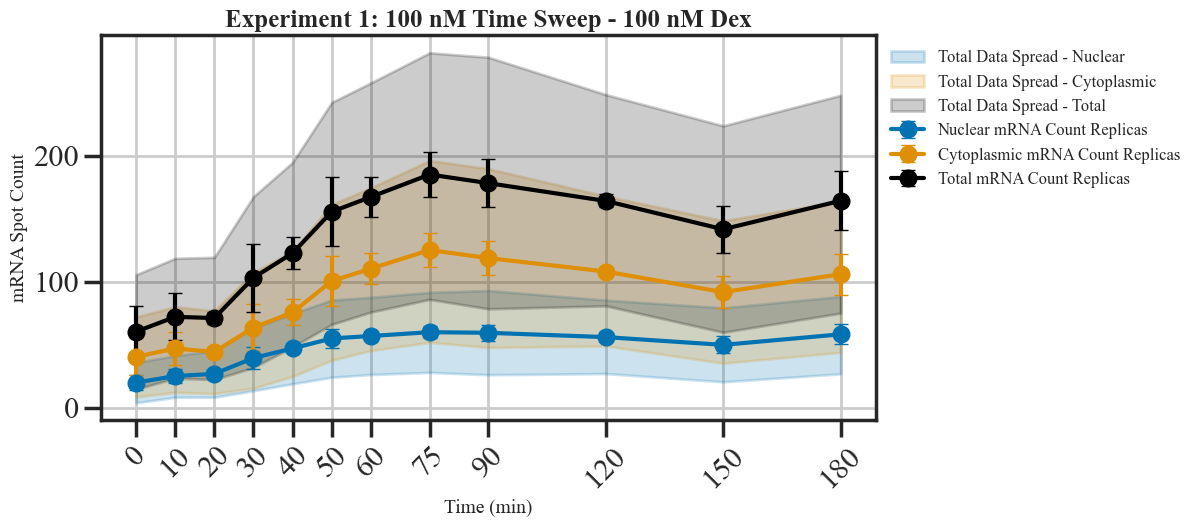

In [17]:
# Make a copy of the DUSP1 data
DUSP1_data = DUSP1_TS_results.copy()

# Experiment 1: 100 nM Dex time sweep with 12 timepoints
df_expt1 = DUSP1_data[DUSP1_data['replica'].isin(['D', 'E', 'F', 'M', 'N'])]
expt1_timepoints = [10, 20, 30, 40, 50, 60, 75, 90, 120, 150, 180]
expt1_concs = [100]

# Calculate means for each replica
replica_means = DUSP1_data.groupby(['dex_conc', 'time', 'replica']).agg({
    'nuc_MG_count': 'mean',
    'cyto_MG_count': 'mean',
    'MG_count': 'mean',
}).reset_index()

# Calculate the mean and standard deviation of the replica means
summary_stats = replica_means.groupby(['dex_conc', 'time']).agg({
    'nuc_MG_count': ['mean', 'std'],
    'cyto_MG_count': ['mean', 'std'],
    'MG_count': ['mean', 'std'],
}).reset_index()

# Rename columns for easier access
summary_stats.columns = [
    'dex_conc', 'time',
    'mean_nuc_count', 'std_nuc_count',
    'mean_cyto_count', 'std_cyto_count',
    'mean_MG_count', 'std_MG_count'
]

# Calculate overall mean and standard deviation for each concentration and time point
overall_stats = DUSP1_data.groupby(['dex_conc', 'time']).agg({
    'nuc_MG_count': ['mean', 'std'],
    'cyto_MG_count': ['mean', 'std'],
    'MG_count': ['mean', 'std'],
}).reset_index()

# Rename columns for easier access
overall_stats.columns = [
    'dex_conc', 'time',
    'overall_mean_nuc', 'overall_std_nuc',
    'overall_mean_cyto', 'overall_std_cyto',
    'overall_mean_MG', 'overall_std_MG'
]

# Extract 0 min data (shared baseline from dex_conc == 0)
zero_min_summary = summary_stats[summary_stats['time'] == 0]
zero_min_overall = overall_stats[overall_stats['time'] == 0]

# Set Style
sns.set_theme(style="ticks", palette="colorblind", context="poster", font='times new roman')

# Define the color palette for Nuclear and Cytoplasmic intensities
colors_nuc_cyto = sns.color_palette("colorblind", 2)  # Two colors: one for Nuclear, one for Cytoplasmic

# Loop through the three experiments
experiments = {
    "Experiment 1: 100 nM Time Sweep": (expt1_concs, expt1_timepoints),
}

for expt_name, (concs, timepoints) in experiments.items():
    for conc in concs:
        # Filter data for plotting
        subset_summary = summary_stats[(summary_stats['dex_conc'] == conc) & (summary_stats['time'].isin(timepoints))]
        subset_overall = overall_stats[(overall_stats['dex_conc'] == conc) & (overall_stats['time'].isin(timepoints))]

        # Add 0 min time point to all subsets if not already present
        if 0 not in subset_summary['time'].values:
            subset_summary = pd.concat([zero_min_summary, subset_summary], ignore_index=True)
        if 0 not in subset_overall['time'].values:
            subset_overall = pd.concat([zero_min_overall, subset_overall], ignore_index=True)

        plt.figure(figsize=(10, 5))

        # Plot Nuclear mRNA Count Mean with Error Bars
        plt.errorbar(subset_summary['time'], subset_summary['mean_nuc_count'],
                     yerr=subset_summary['std_nuc_count'], fmt='-o', color=colors_nuc_cyto[0], capsize=5,
                     label='Nuclear mRNA Count Replicas')

        # Filling between std deviations for overall data - Nuclear
        plt.fill_between(subset_overall['time'],
                         subset_overall['overall_mean_nuc'] - subset_overall['overall_std_nuc'],
                         subset_overall['overall_mean_nuc'] + subset_overall['overall_std_nuc'],
                         color=colors_nuc_cyto[0], alpha=0.2, label='Total Data Spread - Nuclear')

        # Plot Cytoplasmic mRNA Count Mean with Error Bars
        plt.errorbar(subset_summary['time'], subset_summary['mean_cyto_count'],
                     yerr=subset_summary['std_cyto_count'], fmt='-o', color=colors_nuc_cyto[1], capsize=5,
                     label='Cytoplasmic mRNA Count Replicas')

        # Filling between std deviations for overall data - Cytoplasmic
        plt.fill_between(subset_overall['time'],
                         subset_overall['overall_mean_cyto'] - subset_overall['overall_std_cyto'],
                         subset_overall['overall_mean_cyto'] + subset_overall['overall_std_cyto'],
                         color=colors_nuc_cyto[1], alpha=0.2, label='Total Data Spread - Cytoplasmic')
        
        # Plot the total mRNA Count Mean with Error Bars
        plt.errorbar(subset_summary['time'], subset_summary['mean_MG_count'],
                    yerr=subset_summary['std_MG_count'], fmt='-o', color='black', capsize=5,
                    label='Total mRNA Count Replicas')
        # Filling between std deviations for overall data - Total
# After
        plt.fill_between(subset_overall['time'],
                        subset_overall['overall_mean_MG'] - subset_overall['overall_std_MG'],
                        subset_overall['overall_mean_MG'] + subset_overall['overall_std_MG'],
                        color='black', alpha=0.2, label='Total Data Spread - Total')
        # Set x-ticks to be the time points
        plt.xticks(subset_summary['time'], rotation=45)

        # Customize the plot
        plt.title(f"{expt_name} - {conc} nM Dex", fontsize=18, fontweight='bold')
        plt.xlabel('Time (min)', fontsize=14)
        plt.ylabel('mRNA Spot Count', fontsize=14)
        plt.grid(True)
        plt.legend(loc='upper left', fontsize=12, frameon=False, bbox_to_anchor=(1, 1))


        # Show the plot
        plt.show()
